In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/DSData/master/loan_prediction.csv")
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [4]:
df.shape

(614, 13)

In [5]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [14]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


Majority of the columns are non-numeric and need to be encoded

In [6]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

Gender, Married, Dependents, Self-employed, LoanAmount, Loan_Amount_Term, Credit_History columns have NaN values

### Target Variable Analysis

Target variable is Loan_Status. This is a classification problem (Target has 2 possibilities Y and N)

In [9]:
df['Loan_Status'].unique()

array(['Y', 'N'], dtype=object)

In [8]:
df.Loan_Status.value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

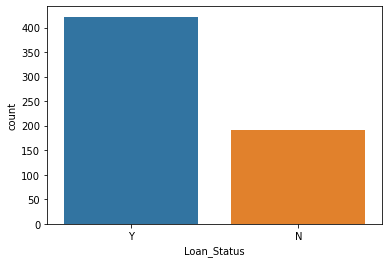

In [12]:
sns.countplot(df['Loan_Status'])

Class imbalance exists since there is huge difference in both the counts

In [15]:
df.drop(['Loan_ID'], axis = 1, inplace = True)

### Treating the NaN values

In [16]:
for col in df.columns:
    if df[col].dtype=="object" and df[col].isnull().sum()>0:
        df.loc[df["Loan_Status"]=="Y",[col]]=df.loc[df["Loan_Status"]=="Y",[col]].fillna(df.loc[df["Loan_Status"]=="Y",[col]].mode().iloc[0])
        df.loc[df["Loan_Status"]=="N",[col]]=df.loc[df["Loan_Status"]=="N",[col]].fillna(df.loc[df["Loan_Status"]=="N",[col]].mode().iloc[0])

In [17]:
df.isnull().sum()

Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [18]:
df['LoanAmount'].fillna(int(df['LoanAmount'].mean()), inplace=True)
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,146.0,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [19]:
df.isnull().sum()

Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [20]:
for col in df.columns:
    if df[col].isnull().sum()>0:
        df.loc[df["Loan_Status"]=="Y",[col]]=df.loc[df["Loan_Status"]=="Y",[col]].fillna(df.loc[df["Loan_Status"]=="Y",[col]].mode().iloc[0])
        df.loc[df["Loan_Status"]=="N",[col]]=df.loc[df["Loan_Status"]=="N",[col]].fillna(df.loc[df["Loan_Status"]=="N",[col]].mode().iloc[0])

In [21]:
df.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

There are no Null values now

### Applying Encoding

In [22]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df1=df.apply(label_encoder.fit_transform)

In [23]:
df1.dtypes

Gender               int32
Married              int32
Dependents           int32
Education            int32
Self_Employed        int32
ApplicantIncome      int64
CoapplicantIncome    int64
LoanAmount           int64
Loan_Amount_Term     int64
Credit_History       int64
Property_Area        int32
Loan_Status          int32
dtype: object

All the columns are now with numeric data type

### Resampling for solving Class imbalance

In [24]:
df2=df1
df2

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,376,0,99,8,1,2,1
1,1,1,1,0,0,306,60,81,8,1,0,0
2,1,1,0,0,1,139,0,26,8,1,2,1
3,1,1,0,1,0,90,160,73,8,1,2,1
4,1,0,0,0,0,381,0,94,8,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,125,0,29,8,1,0,1
610,1,1,3,0,0,275,0,7,5,1,0,1
611,1,1,1,0,0,431,3,162,8,1,2,1
612,1,1,2,0,0,422,0,132,8,1,2,1


In [25]:
# class count
best_quality_count_0, best_quality_count_1 = df2['Loan_Status'].value_counts()
print('best_quality_count_0, :',best_quality_count_0, '\n best_quality_count_1 : ', best_quality_count_1)

best_quality_count_0, : 422 
 best_quality_count_1 :  192


In [26]:
# Separate class
best_quality_0 = df2[df2['Loan_Status'] == 1]
best_quality_1 = df2[df2['Loan_Status'] == 0]# print the shape of the class
print('best quality 0:', best_quality_0.shape)
print('best quality 1:', best_quality_1.shape)

best quality 0: (422, 12)
best quality 1: (192, 12)


In [27]:
best_quality_1_over = best_quality_1.sample(best_quality_count_0, replace=True)

df3 = pd.concat([best_quality_1_over, best_quality_0], axis=0)

print("total class of 1 and 0: \n",df3['Loan_Status'].value_counts())

total class of 1 and 0: 
 1    422
0    422
Name: Loan_Status, dtype: int64


In [28]:
df3.shape

(844, 12)

<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

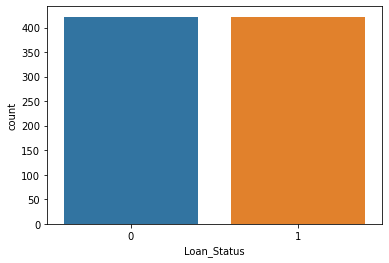

In [29]:
sns.countplot(x="Loan_Status",data=df3)

### EDA

### Univariate Analysis

### Plotting Distribution plot for checking data distribution and skewness

<AxesSubplot:xlabel='Gender', ylabel='Density'>

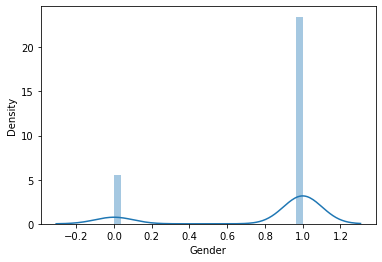

In [30]:
sns.distplot(df3['Gender'])

<AxesSubplot:xlabel='Married', ylabel='Density'>

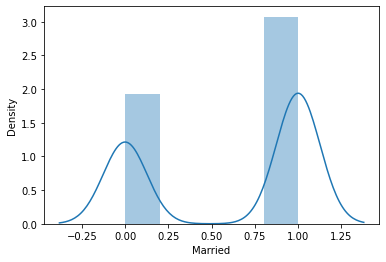

In [31]:
sns.distplot(df3['Married'])

<AxesSubplot:xlabel='Dependents', ylabel='Density'>

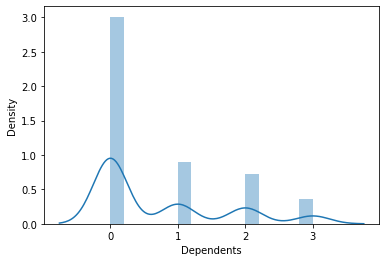

In [32]:
sns.distplot(df3['Dependents'])

<AxesSubplot:xlabel='Education', ylabel='Density'>

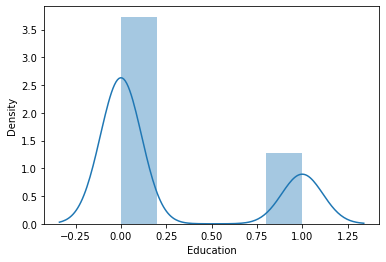

In [33]:
sns.distplot(df3['Education'])

<AxesSubplot:xlabel='Self_Employed', ylabel='Density'>

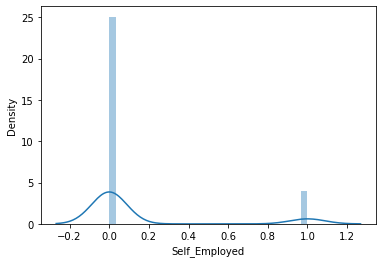

In [34]:
sns.distplot(df3['Self_Employed'])

<AxesSubplot:xlabel='ApplicantIncome', ylabel='Density'>

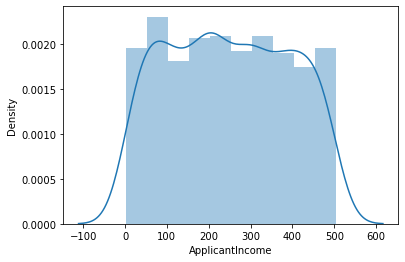

In [35]:
sns.distplot(df3['ApplicantIncome'])

<AxesSubplot:xlabel='CoapplicantIncome', ylabel='Density'>

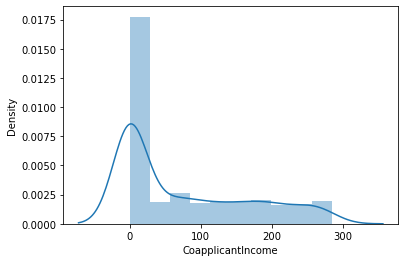

In [36]:
sns.distplot(df3['CoapplicantIncome'])

<AxesSubplot:xlabel='LoanAmount', ylabel='Density'>

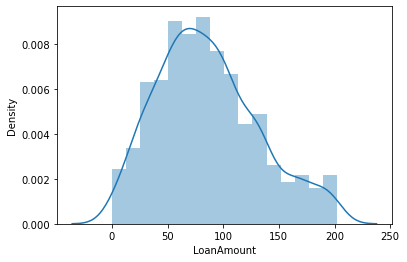

In [37]:
sns.distplot(df3['LoanAmount'])

<AxesSubplot:xlabel='Loan_Amount_Term', ylabel='Density'>

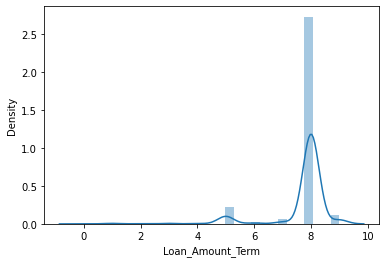

In [38]:
sns.distplot(df3['Loan_Amount_Term'])

<AxesSubplot:xlabel='Credit_History', ylabel='Density'>

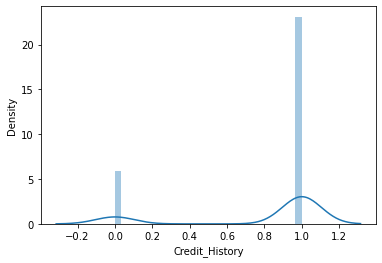

In [39]:
sns.distplot(df3['Credit_History'])

<AxesSubplot:xlabel='Property_Area', ylabel='Density'>

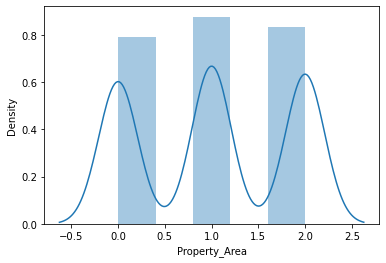

In [40]:
sns.distplot(df3['Property_Area'])

<AxesSubplot:xlabel='Loan_Status', ylabel='Density'>

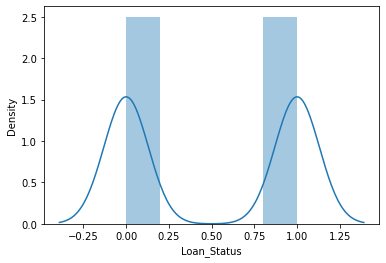

In [41]:
sns.distplot(df3['Loan_Status'])

All the columns have skewness and needs to be handled

### Multivariate Analysis

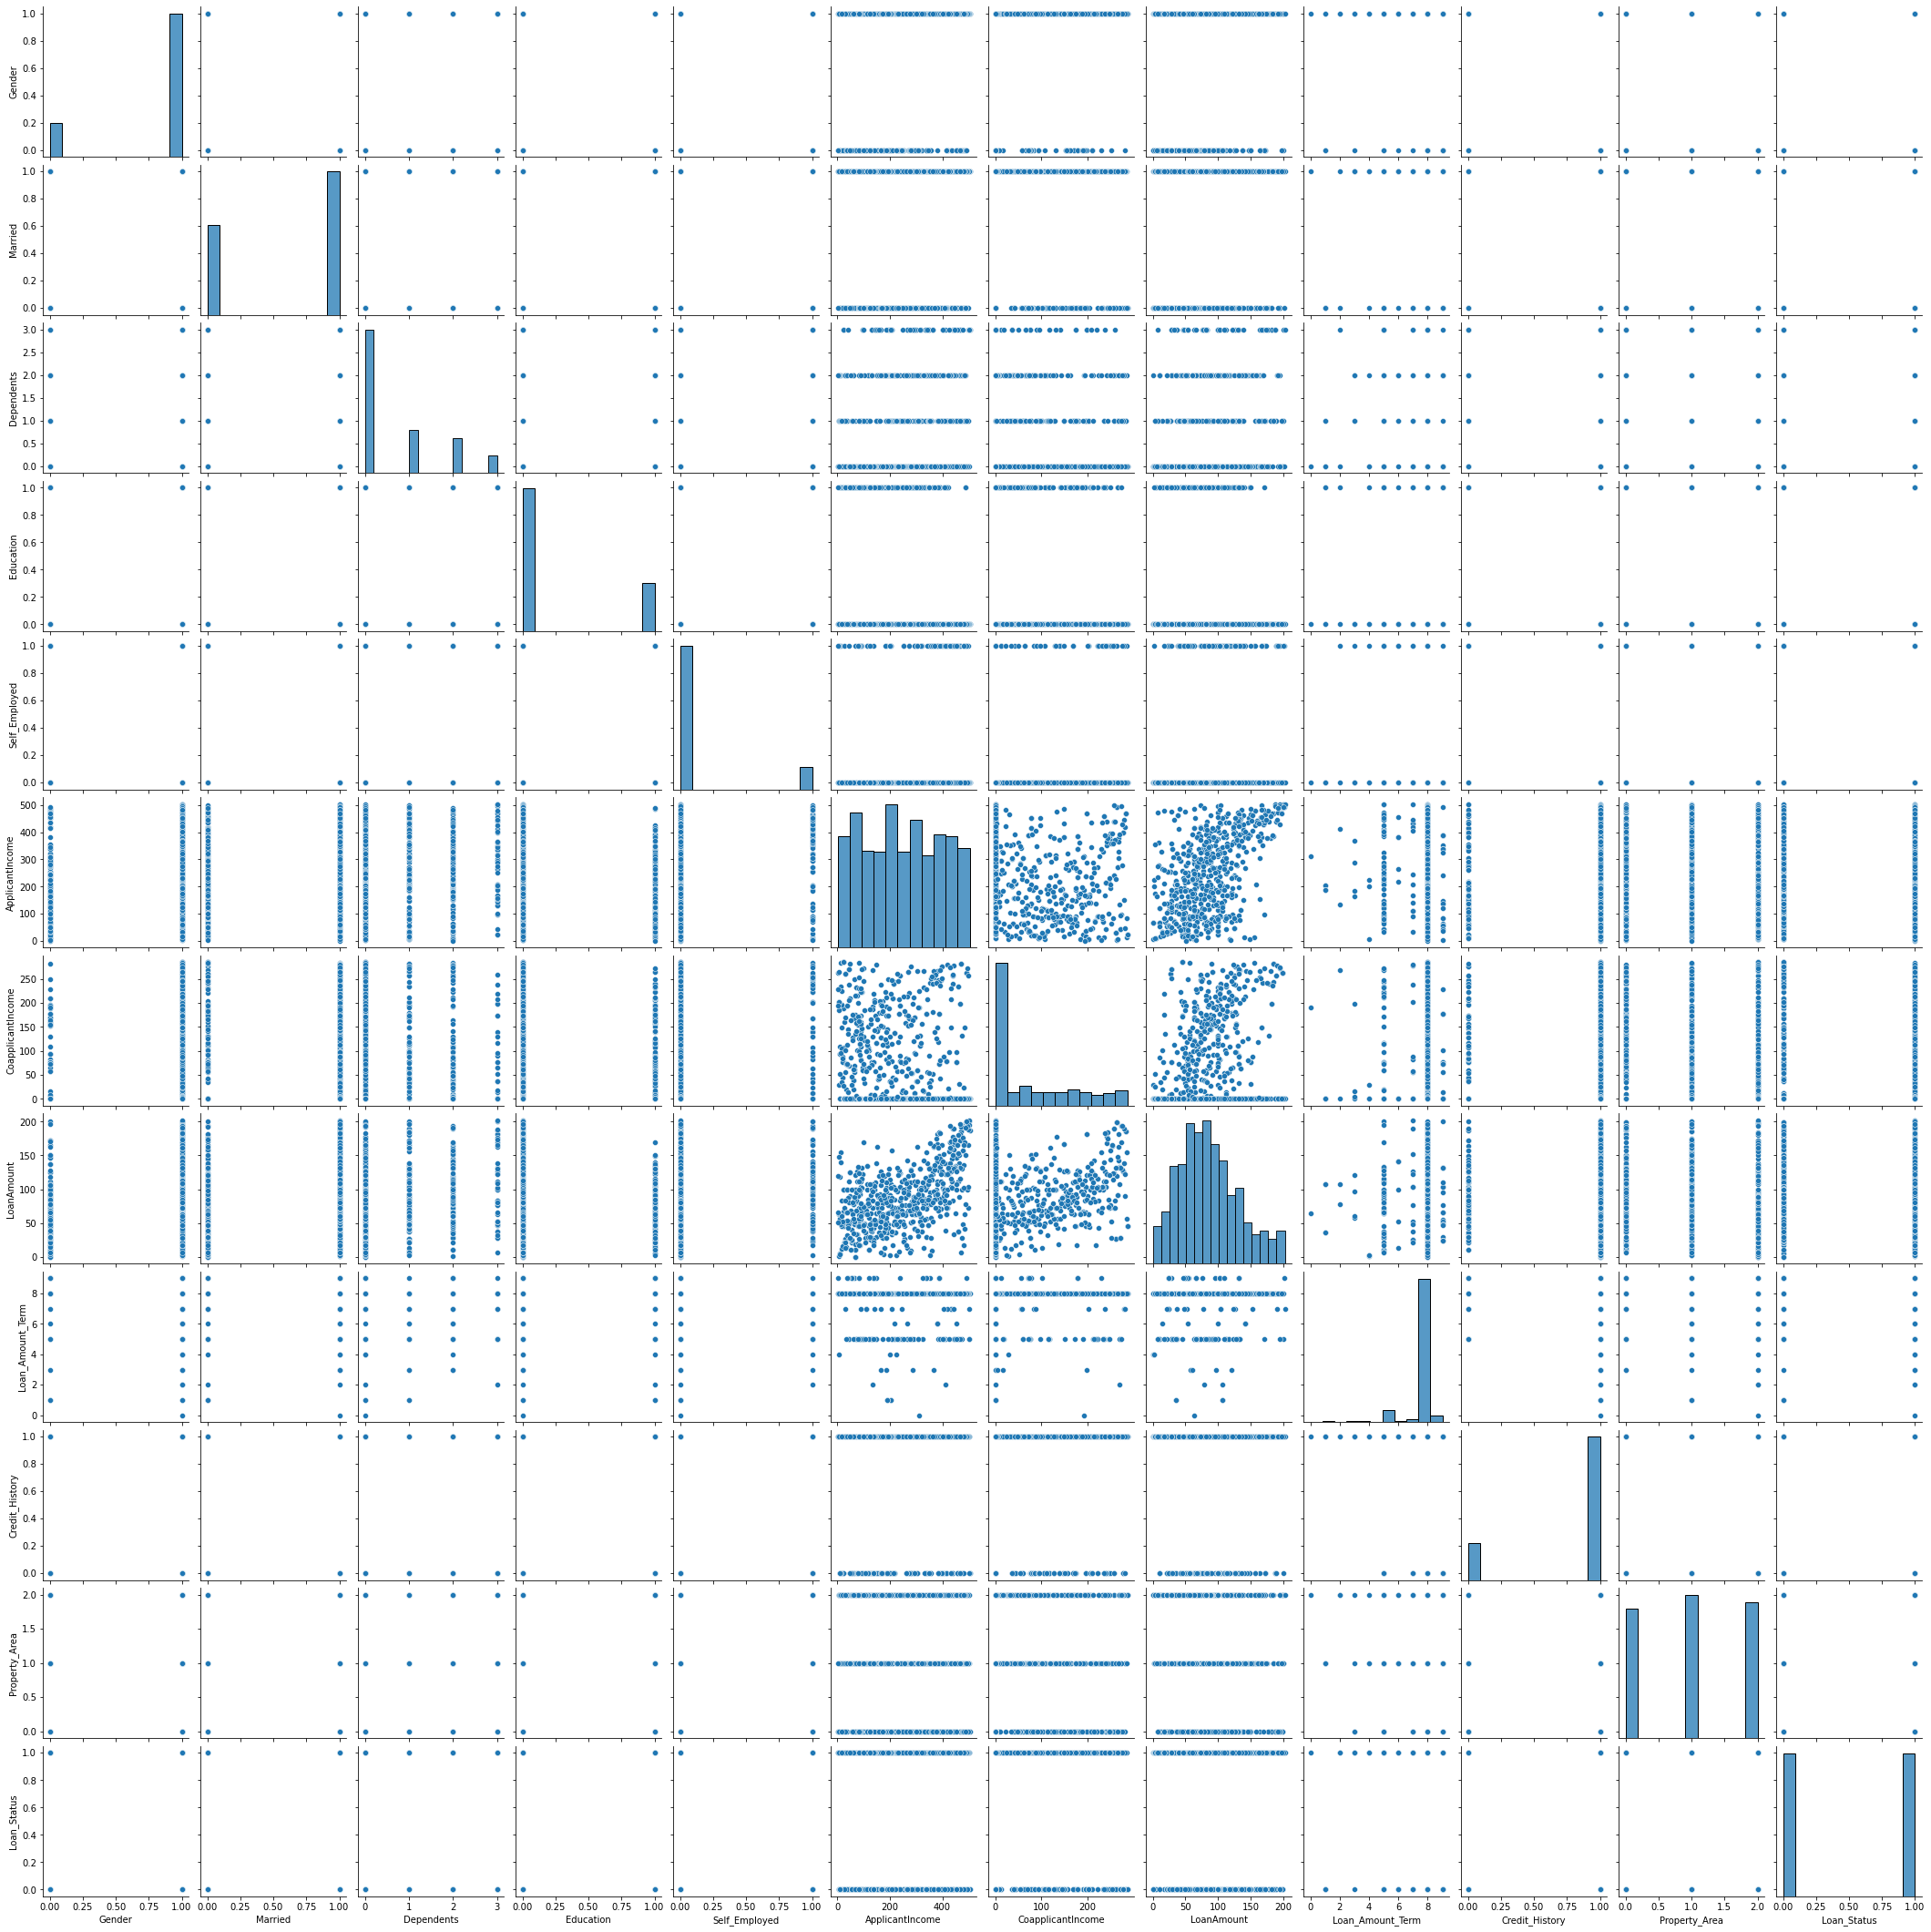

In [43]:
sns.pairplot(df3)

### Plotting box plot for checking Outliers

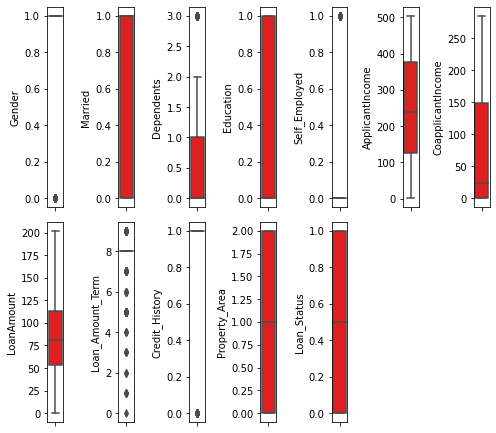

In [42]:
collist=df3.columns.values
ncol= 7
nrows= 7

plt.figure(figsize=(ncol,3*ncol))
for i in range(0,len(collist)):
    plt.subplot(nrows, ncol, i+1)
    sns.boxplot(y=df3[collist[i]], color='red', orient='x')
    plt.tight_layout()

Gender, Dependents, Self Employed, Loan_Amount_Term, Credit_History columns have outliers

### Removing Skewness

In [44]:
df3.skew()

Gender              -1.576958
Married             -0.473205
Dependents           1.133621
Education            1.134982
Self_Employed        2.124362
ApplicantIncome      0.035886
CoapplicantIncome    0.851625
LoanAmount           0.488626
Loan_Amount_Term    -3.329526
Credit_History      -1.473310
Property_Area       -0.030107
Loan_Status          0.000000
dtype: float64

### Removing Outliers

In [48]:
from scipy.stats import zscore

z=np.abs(zscore(df3))

df4=df3[(z<3).all(axis=1)]

In [52]:
df4.shape

(830, 12)

In [53]:
df3.shape

(844, 12)

In [54]:
Loss_percentage=(844-830)/844*100
print(Loss_percentage)

1.6587677725118484


outliers removal using ZScore is deleting less than 8% data. So proceeding with new df.

In [49]:
cor=df4.corr()
cor

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Gender,1.000000,0.367654,0.184094,0.063363,-0.042033,0.046144,0.202516,0.145589,-0.117275,0.009524,0.004159,0.028353
Married,0.367654,1.000000,0.345853,0.032536,0.000332,0.022140,0.260103,0.220279,-0.155584,0.023795,0.040586,0.132419
Dependents,0.184094,0.345853,1.000000,0.066609,0.034043,0.121110,-0.085315,0.127169,-0.140361,-0.019308,0.020752,0.060601
Education,0.063363,0.032536,0.066609,1.000000,-0.018959,-0.202896,-0.037379,-0.152640,-0.112811,-0.078507,-0.098817,-0.135765
Self_Employed,-0.042033,0.000332,0.034043,-0.018959,1.000000,0.205630,-0.031827,0.136124,-0.025277,0.001824,0.024095,-0.019255
ApplicantIncome,0.046144,0.022140,0.121110,-0.202896,0.205630,1.000000,-0.219053,0.572575,0.009407,0.075549,-0.074088,-0.005746
CoapplicantIncome,0.202516,0.260103,-0.085315,-0.037379,-0.031827,-0.219053,1.000000,0.239481,-0.050852,0.008601,-0.060294,0.039682
LoanAmount,0.145589,0.220279,0.127169,-0.152640,0.136124,0.572575,0.239481,1.000000,0.043834,0.043355,-0.069074,0.002369
Loan_Amount_Term,-0.117275,-0.155584,-0.140361,-0.112811,-0.025277,0.009407,-0.050852,0.043834,1.000000,0.046717,-0.101319,-0.018567
Credit_History,0.009524,0.023795,-0.019308,-0.078507,0.001824,0.075549,0.008601,0.043355,0.046717,1.000000,-0.013700,0.467198


<AxesSubplot:>

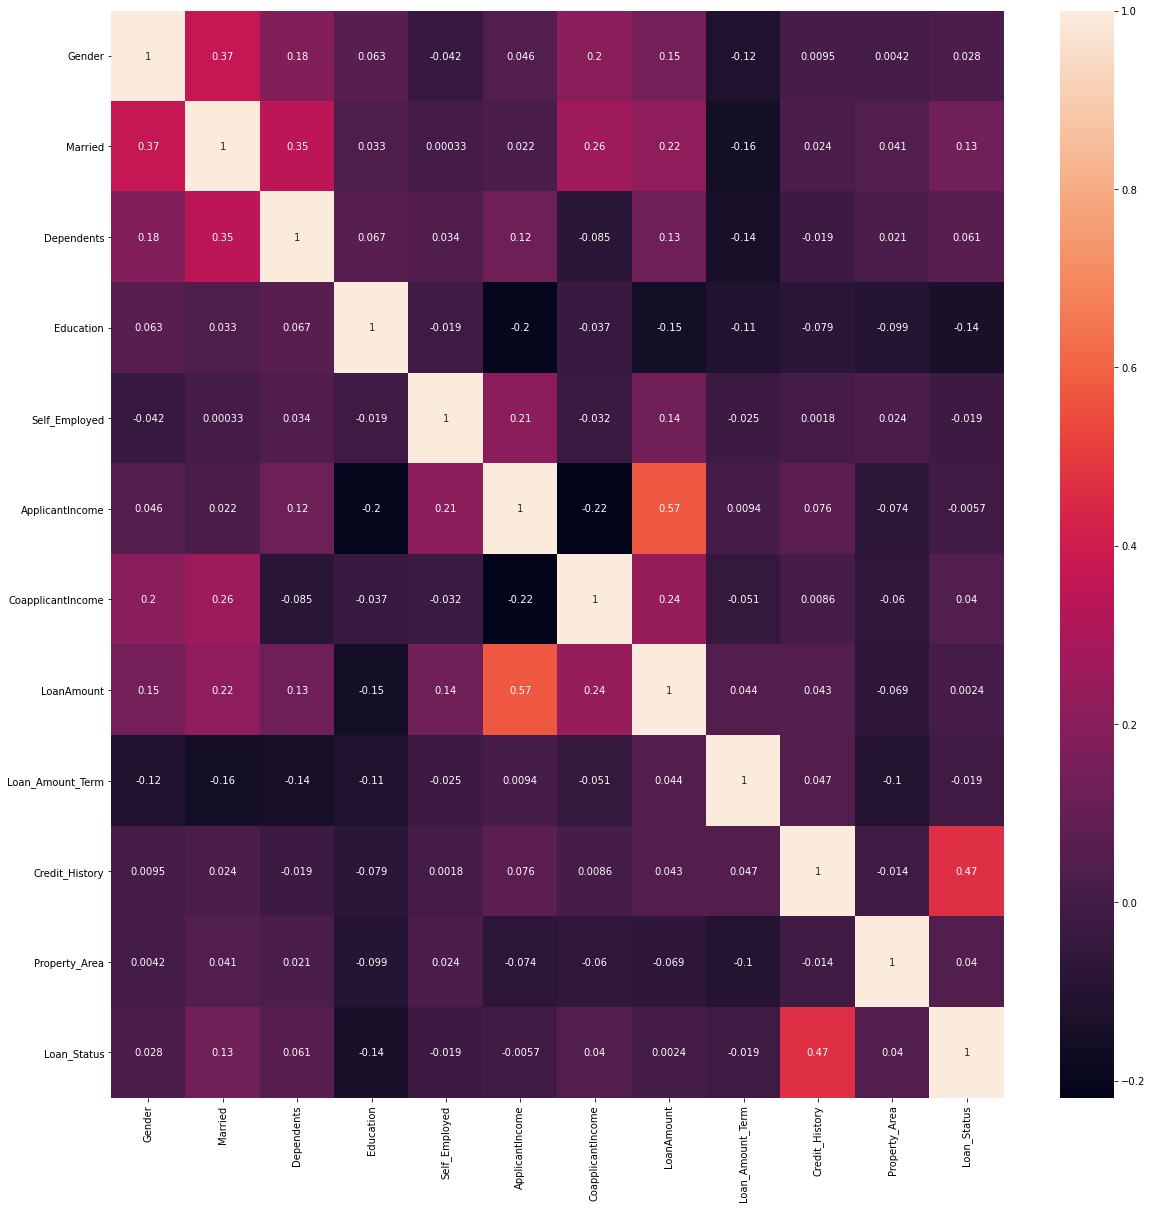

In [50]:
import matplotlib.pyplot as plt
fig, ax_size = plt.subplots(figsize=(20,20))
sns.heatmap(cor,annot=True,ax=ax_size,linecolor='r')

### Checking for multi collinearity

In [55]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [56]:
vif_data = pd.DataFrame()
vif_data["feature"] = df4.columns

In [57]:
vif_data["VIF"] = [variance_inflation_factor(df1.values, i)
                            for i in range(len(df1.columns))]
print(vif_data)

              feature        VIF
0              Gender   6.334182
1             Married   3.843150
2          Dependents   1.841688
3           Education   1.336627
4       Self_Employed   1.205138
5     ApplicantIncome   7.214162
6   CoapplicantIncome   2.529805
7          LoanAmount   8.910275
8    Loan_Amount_Term  12.971246
9      Credit_History   9.295723
10      Property_Area   2.621370
11        Loan_Status   4.623913


All VIF values are below 10. So not dropping any columns.

### Dividing the data into independent(x) and dependent(y) variables

In [58]:
x=df4.drop('Loan_Status',axis=1)
y=df4['Loan_Status']

### Scaling the Data

In [59]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

In [60]:
maxAccu=0
maxRs=0
for i in range(1,2000):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30, random_state=i)
    mod = DecisionTreeClassifier()
    mod.fit(x_train,y_train)
    pred=mod.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best Accuracy is ", maxAccu, "On random_state", maxRS)

Best Accuracy is  0.9156626506024096 On random_state 1899


In [61]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30, random_state=1899)

### Normalisation

In [63]:
from sklearn.preprocessing import MinMaxScaler
norm = MinMaxScaler()
norm_fit = norm.fit(x_train)
new_xtrain = norm_fit.transform(x_train)
new_xtest = norm_fit.transform(x_test)

In [64]:
print(new_xtrain)

[[0.   0.   0.   ... 0.75 1.   0.5 ]
 [1.   1.   0.   ... 0.75 1.   0.  ]
 [1.   1.   1.   ... 0.75 1.   0.  ]
 ...
 [1.   1.   0.   ... 0.75 0.   1.  ]
 [1.   1.   0.   ... 1.   0.   1.  ]
 [1.   0.   0.   ... 0.75 1.   1.  ]]


In [65]:
print(new_xtest)

[[1.         1.         0.         ... 0.         1.         0.5       ]
 [1.         0.         0.         ... 0.75       1.         0.5       ]
 [1.         1.         0.66666667 ... 0.75       1.         0.        ]
 ...
 [1.         0.         0.         ... 0.75       1.         1.        ]
 [0.         0.         0.         ... 0.         1.         1.        ]
 [1.         1.         0.33333333 ... 0.         0.         1.        ]]


### Model Creation

In [70]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.ensemble import GradientBoostingClassifier

In [67]:
DTC=DecisionTreeClassifier()
DTC.fit(new_xtrain,y_train)
pred_dtc=DTC.predict(new_xtest)
acc=classification_report(y_test,pred_dtc)
print(acc)

              precision    recall  f1-score   support

           0       0.90      0.93      0.92       131
           1       0.92      0.89      0.91       118

    accuracy                           0.91       249
   macro avg       0.91      0.91      0.91       249
weighted avg       0.91      0.91      0.91       249



In [68]:
RFC=RandomForestClassifier()
RFC.fit(new_xtrain,y_train)
pred_rfc=RFC.predict(new_xtest)
acc=classification_report(y_test,pred_rfc)
print(acc)

              precision    recall  f1-score   support

           0       0.90      0.92      0.91       131
           1       0.91      0.89      0.90       118

    accuracy                           0.91       249
   macro avg       0.91      0.91      0.91       249
weighted avg       0.91      0.91      0.91       249



In [69]:
SV=SVC()
SV.fit(new_xtrain,y_train)
pred_svc=SV.predict(new_xtest)
acc=classification_report(y_test,pred_svc)
print(acc)

              precision    recall  f1-score   support

           0       0.93      0.49      0.64       131
           1       0.63      0.96      0.76       118

    accuracy                           0.71       249
   macro avg       0.78      0.72      0.70       249
weighted avg       0.79      0.71      0.70       249



In [71]:
GBC = GradientBoostingClassifier(random_state=1)
GBC.fit(new_xtrain, y_train)
pred_gbc = GBC.predict(new_xtest)
gbc=classification_report(y_test,pred_gbc)
print(gbc)

              precision    recall  f1-score   support

           0       0.86      0.82      0.84       131
           1       0.81      0.86      0.83       118

    accuracy                           0.84       249
   macro avg       0.84      0.84      0.84       249
weighted avg       0.84      0.84      0.84       249



### Finding Cross Validation Score

In [72]:
from sklearn.model_selection import cross_val_score

In [73]:
print(cross_val_score(DTC,x,y,cv=5).mean())

0.8421686746987952


In [74]:
print(cross_val_score(RFC,x,y,cv=5).mean())

0.9048192771084338


In [75]:
print(cross_val_score(SV,x,y,cv=5).mean())

0.5144578313253012


In [76]:
print(cross_val_score(GBC,x,y,cv=5).mean())

0.8192771084337348


### Difference between model accuracy and cv score

DTC: 91-84=7

RFC: 91-90=1

SV:  71-51=20

GBC: 84-82=2

Random Forest Classifier has least difference and highest accuracy. Hence considering the same

### Hyper Parameter Tuning

In [77]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

In [78]:
from scipy.stats import randint
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV

In [80]:
# Creating the hyperparameter grid 
param_dist = {"max_depth": [3, None],
              "max_features": randint(1, 9),
              "min_samples_leaf": randint(1, 9),
              "criterion": ["gini", "entropy"]}
  
# Instantiating Decision Tree classifier
tree = RandomForestClassifier()
  
# Instantiating RandomizedSearchCV object
tree_cv = RandomizedSearchCV(tree, param_dist, cv = 5)
  
tree_cv.fit(x, y)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [3, None],
                                        'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000002B5B218DE50>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000002B5B218DDC0>})

In [81]:
print("Tuned Ramdom forest Parameters: {}".format(tree_cv.best_params_))
print("Best score is {}".format(tree_cv.best_score_))

Tuned Ramdom forest Parameters: {'criterion': 'entropy', 'max_depth': None, 'max_features': 2, 'min_samples_leaf': 1}
Best score is 0.9036144578313253


### Predictions

In [82]:
preds = RFC.predict(new_xtest)
print(preds[:30])
print(y_test[:30].values)

[1 1 1 0 1 1 1 0 0 1 1 1 0 0 0 1 1 1 1 1 0 0 0 0 0 0 1 1 1 0]
[1 1 1 0 0 1 1 0 0 1 1 1 0 0 0 1 1 1 1 1 0 0 0 0 1 0 1 1 1 0]


First row is predicted values and second row Actual values. Most of the predicted and actual values are matching.

### Final Model Creation

In [83]:
Final_mod = RandomForestClassifier(criterion= 'entropy', max_depth = None, max_features = 2, min_samples_leaf = 1)
Final_mod.fit(new_xtrain, y_train)
pred = Final_mod.predict(new_xtest)
acc=accuracy_score(y_test, pred)
print(acc*100)

91.96787148594377


In [84]:
from sklearn.metrics import roc_curve, auc, roc_auc_score

RFC.fit(new_xtrain,y_train)
probs = RFC.predict(new_xtest)

# calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, probs)

# calculate AUC
auc = auc(fpr, tpr)
print('AUC: %.3f' %auc)

AUC: 0.944


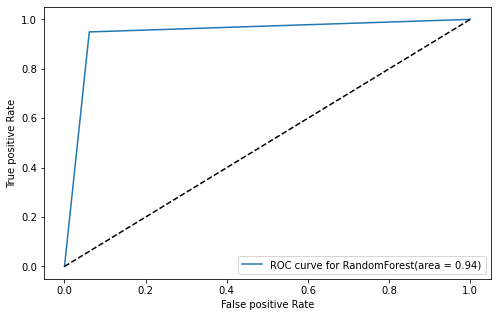

In [85]:
plt.figure(figsize=(8,5))
plt.plot(fpr, tpr, label='ROC curve for RandomForest(area = %0.2f)' % auc)
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False positive Rate')
plt.ylabel('True positive Rate')
plt.legend(loc='lower right')

### Confusion Matrix

Text(91.68, 0.5, 'Predicted Loan status')

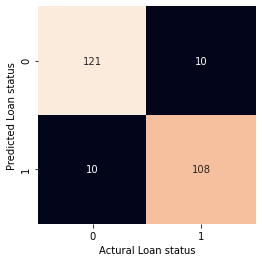

In [86]:
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y_test, pred)
sns.heatmap(confusion, square=True, annot=True, fmt='d', cbar=False)
           # xticklabels=digits.target_names,
            #yticklabels=digits.target_names)
plt.xlabel('Actural Loan status')
plt.ylabel('Predicted Loan status')

There are 10 false positives and 10 false negatives

### Saving the Final Model

In [87]:
import joblib
joblib.dump(Final_mod,"Loan_Status_Project.pkl")

['Loan_Status_Project.pkl']